# Visual Analysis

In this file, the Dike Model will be explored. By running the model on various scenarios and policies, the model will be analyzed.



In [40]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [41]:
# make sure pandas is version 1.0 or higher
# make sure networkx is version 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.5


In [42]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [43]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-4
# each problem formulation has its own list of outcomes
# 0: is our problem formulation (Veluwe); 1: different problem formulation with 2 kinds of costs together for Veluwe.
# 2: problem formulation Zutphen, 3: problem formulation Doesburg & Cortenoever; 4: problem formulation Overijssel
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [ ]:
import copy

uncertainties = copy.deepcopy(dike_model.uncertainties)

levers = copy.deepcopy(dike_model.levers)

In [8]:
# running the model through EMA workbench
with (MultiprocessingEvaluator(dike_model) as evaluator):
    results= evaluator.perform_experiments(scenarios=1000, policies=275)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 1000 scenarios * 275 policies * 1 model(s) = 275000 experiments
100%|████████████████████████████████| 275000/275000 [7:42:56<00:00,  9.90it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [44]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs', 'Dike Investment Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,120,258.586586,10.0,0.153032,335.246128,1.5,0.512826,254.019441,1.5,0.457289,...,5,1,0,4,1,8,3,275,0,dikesnet
1,113,194.568728,10.0,0.293827,255.509874,10.0,0.068949,49.174779,1.5,0.544252,...,5,1,0,4,1,8,3,276,0,dikesnet
2,61,91.891624,10.0,0.693707,119.755578,1.5,0.738327,268.405931,1.0,0.673490,...,5,1,0,4,1,8,3,277,0,dikesnet
3,37,202.480358,1.0,0.190247,291.386916,1.0,0.796584,310.859423,1.0,0.472770,...,5,1,0,4,1,8,3,278,0,dikesnet
4,72,107.315104,1.5,0.891560,161.090764,1.0,0.663633,282.442271,10.0,0.736509,...,5,1,0,4,1,8,3,279,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274995,11,36.472636,10.0,0.861548,311.634628,1.0,0.406204,94.075970,1.0,0.267837,...,4,7,9,8,5,6,3,1270,274,dikesnet
274996,83,114.609975,1.0,0.701080,236.826590,1.5,0.384472,229.176558,1.5,0.279916,...,4,7,9,8,5,6,3,1271,274,dikesnet
274997,117,209.328350,1.0,0.152388,30.133378,1.5,0.511698,117.241683,1.5,0.292723,...,4,7,9,8,5,6,3,1272,274,dikesnet
274998,120,55.912132,10.0,0.471526,219.754121,1.5,0.190638,307.120528,1.5,0.020785,...,4,7,9,8,5,6,3,1273,274,dikesnet


In [45]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [46]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(results, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

AttributeError: 'tuple' object has no attribute 'copy'

In [30]:
# outcomes to dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# right columns
columns = ["RfR Total Costs", "Expected Annual Damage", "Dike Investment Costs"]

# calculate mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# calculate in millions
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6
summary.loc[:, "Dike Investment Costs"] = summary["Dike Investment Costs"] / 1e6

# round to two decimals
summary = summary.round(2)

# change index names
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

,RfR Total Costs,Expected Annual Damage,Dike Investment Costs
Mean,1065.2,37.61,511.92
Maximum,1894.7,3620.32,826.16
Minimum,388.4,0.00,198.52


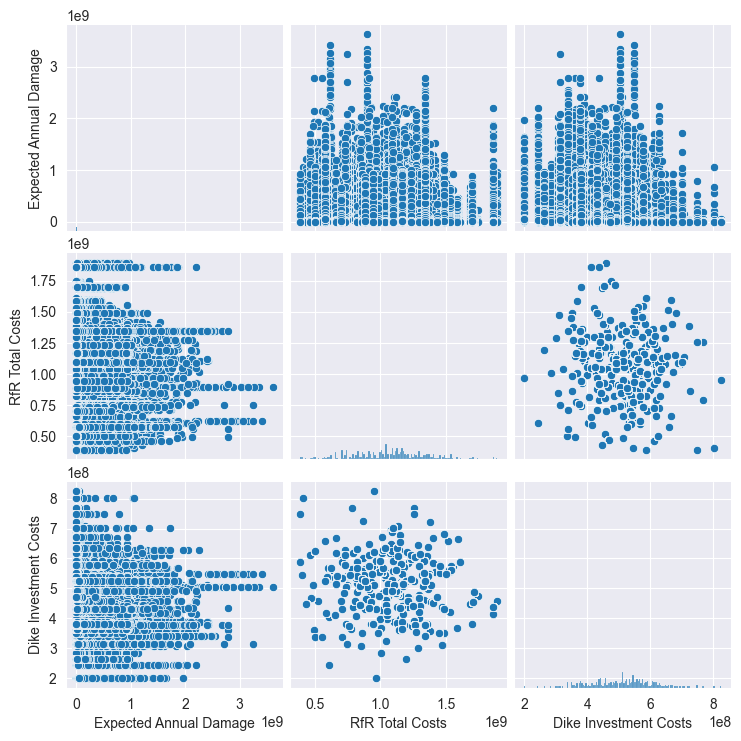

In [36]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

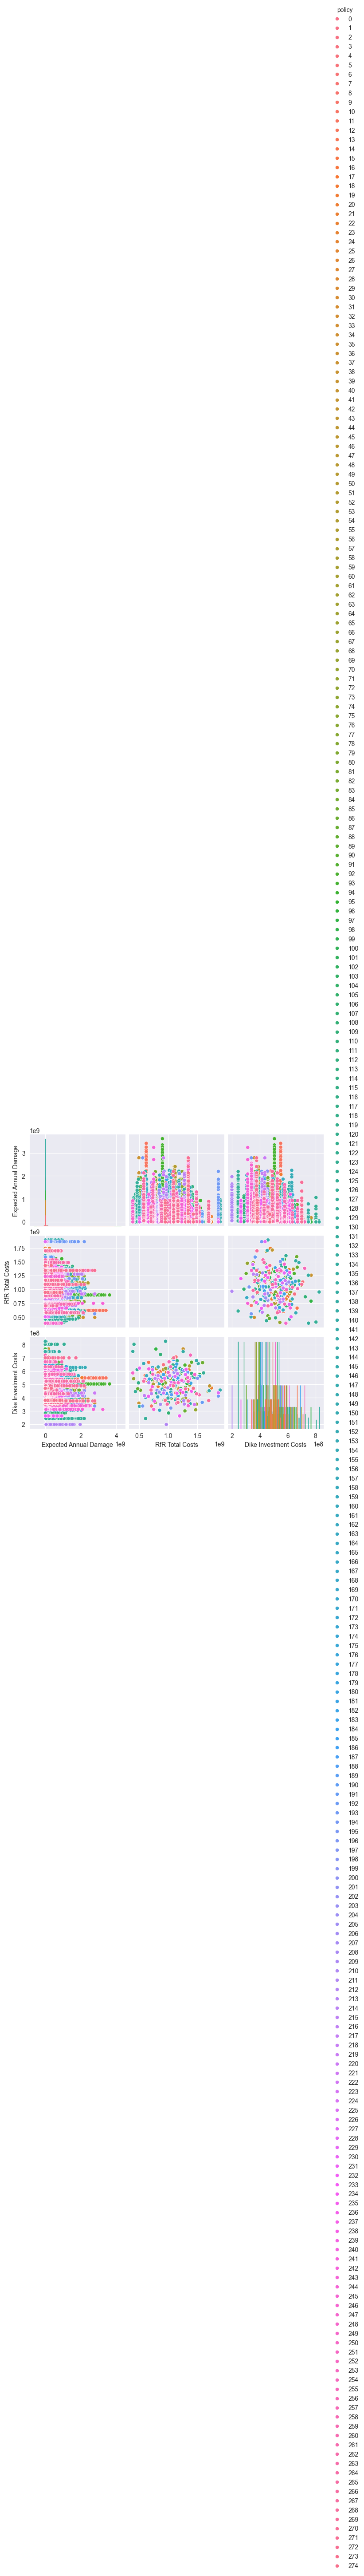

In [37]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

plot = sns.pairplot(data, hue='policy',  vars=outcomes.keys())
plot.add_legend(False)
plt.show()

In [38]:
from ema_workbench import save_results


save_results(results, 'dike_open_exploration_results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz
